### Mount Google Drive and setup paths

In [1]:
import os
import sys

from google.colab import drive

DRIVE_MOUNT_PATH = '/content/drive'
drive.mount(DRIVE_MOUNT_PATH)

PRJ_DIR = os.path.join(DRIVE_MOUNT_PATH, 'My Drive/yyColab/1st-DL-CVMarathon')
sys.path.append(PRJ_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = os.path.join(PRJ_DIR, 'data/lena.png')

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

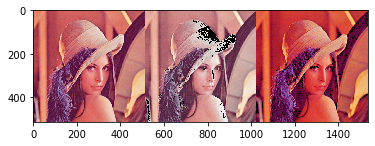

In [3]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[..., 1] = img_hsv_down[..., 1]/255 - change_percentage
img_hsv_down[img_hsv_down[..., 1] < 0] = 0
img_hsv_down[..., 1] = img_hsv_down[..., 1]*255
img_hsv_down = img_hsv_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., 1] = img_hsv_up[..., 1]/255 + change_percentage
img_hsv_up[img_hsv_up[..., 1] > 1] = 1
img_hsv_up[..., 1] = img_hsv_up[..., 1]*255
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 RGB
img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2RGB)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2RGB)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img_rgb, img_hsv_down, img_hsv_up))
plt.imshow(img_hsv_change)
plt.show()

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

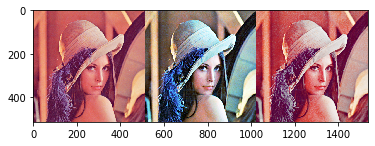

In [4]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = [np.expand_dims(cv2.equalizeHist(img[..., i]), axis=-1) for i in range(3)]

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = np.concatenate(equalHist_by_channel, axis=-1)
img_rgb_equal = cv2.cvtColor(img_bgr_equal, cv2.COLOR_BGR2RGB)

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = np.array(img_hsv)
img_hsv_equal[..., 1] = cv2.equalizeHist(img_hsv_equal[..., 1])
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2RGB)

# 組合圖片 + 顯示圖片
img_rgb_equalHist = np.hstack((img_rgb, img_rgb_equal, img_hsv_equal))
plt.imshow(img_rgb_equalHist)
plt.show()

## 調整對比 / 明亮

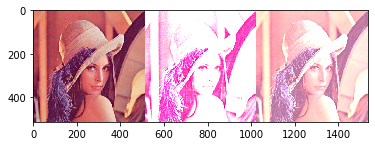

In [5]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=3.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=100)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
img_contrast_light = cv2.cvtColor(img_contrast_light, cv2.COLOR_BGR2RGB)
plt.imshow(img_contrast_light)
plt.show()